In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [3]:
path=pathy+'data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__10/data_ME_2022-05-05-07-24-14.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__3/data_ME_2022-05-04-19-32-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__2/data_ME_2022-05-04-15-34-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__5/data_ME_2022-05-05-03-31-35.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__4/data_ME_2022-05-04-23-32-04.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/

# Setup

In [4]:
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5


##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=2000,600
save=True
l=Lattice.TriangLattice(Npoints_int_pre, save,'CH1')
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, 'CH1')
Vol_rec2=l2.Vol_BZ()



# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill,'CH1')

# ed=Dispersion.Dispersion_circ([tp1,tp2],fill)
[KxFS,KyFS]=ed.FS_contour(NpointsFS_pre)

Machine arg is, CH1
Machine arg is, CH1
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.49313107609556217 .... chemical potential: 23.93702777725383
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
starting contour.....
finished contour..... 3.219944953918457


2352 2513
227.9605415860735 -267.41895551257255 23.93702777725383 4000


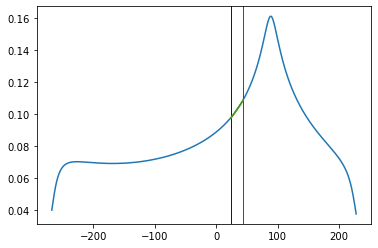

In [5]:

plt.plot(ed.earr,ed.Dos)
plt.axvline(ed.mu, c='b', lw=1)
plt.axvline(ed.mu+20, c='r', lw=1)



indmin=np.argmin((ed.earr-(ed.mu))**2)
indmax=np.argmin((ed.earr-(ed.mu+20))**2)
print(indmin, indmax)

plt.plot(ed.earr[indmin:indmax],ed.Dos[indmin:indmax])



print(np.max(ed.earr), np.min(ed.earr), ed.mu, np.size(ed.earr))

nu=ed.earr[indmin:indmax]-ed.mu
ome=np.linspace(-2*np.pi, 2*np.pi, 2000)
dome=ome[1]-ome[0]
rhonu=ed.Dos[indmin:indmax]

from scipy import stats
slope, intercept, r, p, se = stats.linregress(ed.earr[indmin:indmax], rhonu)
plt.plot(ed.earr[indmin:indmax],ed.earr[indmin:indmax]*slope+intercept)

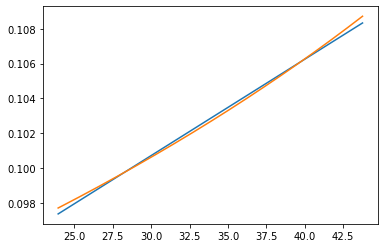

In [6]:
slope, intercept, r, p, se = stats.linregress(ed.earr[indmin:indmax], rhonu)
plt.plot(ed.earr[indmin:indmax],ed.earr[indmin:indmax]*slope+intercept)

plt.plot(ed.earr[indmin:indmax], rhonu)

# Extracting fits at low $\omega$, $q$, $T$

In [7]:
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
Qu=df['Q'].unique()
T=1.0
print(Qu)

[0.03085152 0.03085152 0.03095072 0.03095072 0.09255456 0.09285215
 0.09285215 0.1542576  0.1542576  0.15475359 0.21596063 0.21596063
 0.21665502 0.27766367 0.27855646 0.03057965 0.03057965 0.03066806
 0.09173895 0.09173895 0.09200418 0.15289825 0.15334029 0.21405754
 0.21405754 0.21467641 0.27521684 0.27601253 0.02994262 0.02994262
 0.0300212  0.08982787 0.08982787 0.09006359 0.14971312 0.14971312
 0.15010598 0.20959837 0.20959837 0.21014837 0.26948362 0.27019076
 0.02933961 0.02933961 0.02941134 0.08801883 0.08823403 0.14669805
 0.14669805 0.14705671 0.20537727 0.20537727 0.2058794  0.26405649
 0.26470208 0.02891717 0.02891717 0.0289856  0.0289856  0.0867515
 0.0867515  0.08695681 0.08695681 0.14458583 0.14458583 0.14492801
 0.20242017 0.20242017 0.20289922 0.20289922 0.2602545  0.26087043
 0.0287815  0.0287815  0.02884845 0.02884845 0.08634451 0.08654535
 0.14390752 0.14390752 0.14424224 0.14424224 0.20147053 0.20147053
 0.20193914 0.20193914 0.25903353 0.25963604]


# Testing scaling collapse at several temperatures, momenta, angle frequency

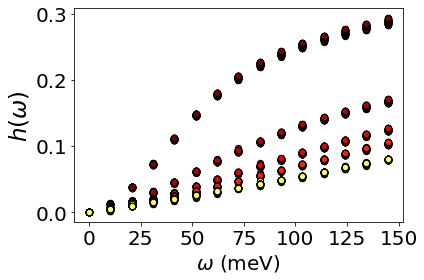

In [8]:
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega) +1

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    for s,Qq in enumerate(Q):
        # print(s)
        y=d.iloc[s]/d.iloc[s,0]-1
        
        # plot(w, y, linewidth=1, color=plt.cm.hot(T/12), ls=':',zorder=T)
        scatter(w, y, s=40, color=plt.cm.hot(T/12), marker='o',  zorder=T, edgecolor='k')
        # plot(w, scalingF(w,popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))
        xticks(size=20)
        yticks(size=20)
        # plt.ylim(2.5,3.5)
        pyplot.locator_params(axis='y', nbins=4)
        pyplot.locator_params(axis='x', nbins=7)
        # legend(prop={'size': 15})

        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [2.0,3.0,4.0,5.0,10.0]:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
        
plt.xlabel(r'$\omega$ (meV)', size=20)
plt.ylabel(r"$h(\omega)$", size=23)
plt.tight_layout()  
    
plt.savefig("imgs/pap_fig3a", dpi=400)  

In [9]:
from scipy.special import spence as dilog2
def analytical_form(omega,T, alpha):
    Jpre=10.34
    
    z=alpha*Jpre/T
    x=omega/T
    
    exp_sum=np.exp(-(z+x))
    exp_dif=np.exp(-(-z+x))
    exp_zero=np.exp(z)
    dilog_1=dilog2(1-(-exp_sum))
    dilog_2=dilog2(1-(-exp_dif))
    dilog_3=dilog2(1-(1-exp_zero))
    
    dilogterms=(-dilog_2+dilog_1-2*dilog_3)/z
    logterm=np.log((exp_sum+1)*(exp_dif+1))
    
    
    
    return alpha*(dilogterms-logterm-z/2)

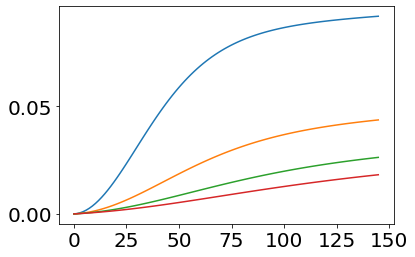

In [10]:
J=10.34
w=np.linspace(0,14,100)


for TT in [2,3,4,5]:
    
    line=(w/10.34 +ed.mu)*slope+intercept
    anf=analytical_form(w*J,TT*J, 2) *line
    plot(w*J, (anf/anf[0]-1 ))
    
    xticks(size=20)
    yticks(size=20)
    # plt.ylim(2.5,3.5)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    # legend(prop={'size': 15})

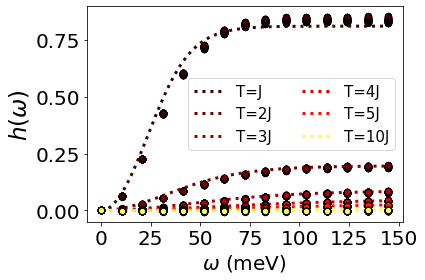

In [11]:
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega) +1

alph=3.05
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        y2=(np.array(d.iloc[s]))/(line)
        y=y2/y2[0]-1
        
        
        scatter(w, y, s=40, color=plt.cm.hot(T/12), marker='o',  zorder=T, edgecolor='k')
        
        if c[int(T)-1]==0:
            w2=np.linspace(0,np.max(w),200)
            anf_pre=(analytical_form(w2,T*10.34, alph) )

            anf=anf_pre
            if T==1.0:
                plot(w2, anf/anf[0]-1,color=plt.cm.hot(T/13),lw=3, ls=':', label='T=J')
            else:
                
                plot(w2, anf/anf[0]-1,color=plt.cm.hot(T/13),lw=3, ls=':', label='T='+str(int(T))+'J')
            c[int(T)-1]=c[int(T)-1]+1
        # plot(w, scalingF(w,popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))
        xticks(size=20)
        yticks(size=20)
        # plt.ylim(2.5,3.5)
        pyplot.locator_params(axis='y', nbins=4)
        pyplot.locator_params(axis='x', nbins=7)
        # legend(prop={'size': 15})

        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [1.,2.0,3.0,4.0,5.0,10.0]:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
        
plt.xlabel(r'$\omega$ (meV)', size=20)
plt.ylabel(r"$h(\omega)$", size=23)
plt.tight_layout()
plt.legend(prop={'size': 15}, ncol=2)
plt.savefig("imgs/pap_fig3a", dpi=400)

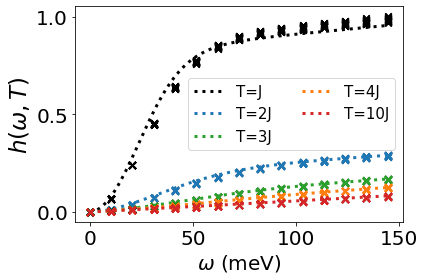

In [12]:
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega) +1

alph=3.05
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    if int(T)!=5:
        for s,Qq in enumerate(Q):
            # print(s)
            line=(w/10.34 +ed.mu)*slope+intercept
            
            if c[int(T)-1]==0:
                
                w2=np.linspace(0,np.max(w),200)
                line=(w2/10.34 +ed.mu)*slope+intercept
                anf_pre=(analytical_form(w2,T*10.34, alph) )*(line)

                anf=anf_pre
                if T==1.0:
                    plot(w2, anf/anf[0]-1,color=csheme[index[str(int(T))]],lw=3, ls=':', label='T=J', zorder=T)
                else:
                    
                    plot(w2, anf/anf[0]-1,color=csheme[index[str(int(T))]],lw=3, ls=':', label='T='+str(int(T))+'J', zorder=T)
                c[int(T)-1]=c[int(T)-1]+1
            y2=(np.array(d.iloc[s]))
            y=y2/y2[0]-1
            
            
            scatter(w, y, s=40, marker="x",  zorder=T, edgecolors="none", facecolors=csheme[index[str(int(T))]])
            # scatter(w, y, s=30, marker="s",  zorder=T, facecolors="none", edgecolors=plt.cm.hot(T/15))
            
            
            # plot(w, scalingF(w,popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))
            xticks(size=20)
            yticks(size=20)
            # plt.ylim(2.5,3.5)
            pyplot.locator_params(axis='y', nbins=4)
            pyplot.locator_params(axis='x', nbins=4)
            # legend(prop={'size': 15})

        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [1.,2.0,3.0,4.0,5.0,10.0]:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
        
plt.xlabel(r'$\omega$ (meV)', size=20)
plt.ylabel(r"$h(\omega, T)$", size=23)
plt.tight_layout()
plt.legend(prop={'size': 15}, ncol=2)
plt.savefig("imgs/pap_fig3", dpi=400)

In [13]:
from scipy.special import spence as dilog2
def analytical_form2(omega,T, alpha):
    Jpre=10.34
    Ji=alpha*Jpre*0.00
    exp_sum=np.exp(-(omega+Ji)/T)
    exp_dif=np.exp(-(omega-Ji)/T)
    exp_zero=np.exp(Ji/T)
    dilog_1=dilog2(1-(-exp_sum))
    dilog_2=dilog2(1-(-exp_dif))
    dilog_3=dilog2(1-(1-exp_zero))
    dilogterms=-dilog_2+dilog_1-2*dilog_3
    logterm=np.log((1/exp_sum+1)*(1/exp_dif+1))
    num=-Ji*Ji/2 +T*T*dilogterms-Ji*T*logterm+2*Ji*omega
    den=1
    
    return num/den

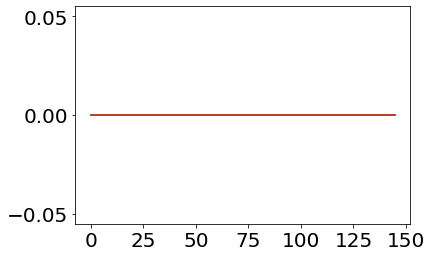

In [14]:
J=10.34
w=np.linspace(0,14,100)


for TT in [2,3,4,5]:
    
    line=(w/10.34 +ed.mu)*slope+intercept
    anf=analytical_form2(w*J,TT*J, 2) *line
    plot(w*J, (anf ))
    
    xticks(size=20)
    yticks(size=20)
    # plt.ylim(2.5,3.5)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    # legend(prop={'size': 15})

In [35]:
def analytical_coef(T, alpha):
    Jpre=10.34
    
    z=alpha*Jpre/T
    
    return alpha*(np.sinh(z)-z)/(2*z*(1+np.cosh(z)))


def analytical_coef2(T, alpha):
    
    Jpre=10.34
    
    z=alpha*Jpre/T
    omega=0
    

    z=alpha*Jpre/T
    x=omega/T
    
    exp_sum=np.exp(-(z+x))
    exp_dif=np.exp(-(-z+x))
    exp_zero=np.exp(z)
    dilog_1=dilog2(1-(-exp_sum))
    dilog_2=dilog2(1-(-exp_dif))
    dilog_3=dilog2(1-(1-exp_zero))
    
    dilogterms=(-dilog_2+dilog_1-2*dilog_3)/z
    logterm=np.log((exp_sum+1)*(exp_dif+1))
    
    ff0=alpha*(dilogterms-logterm-z/2)
    
    return ((alpha*(np.sinh(z)-z)/(2*z*(1+np.cosh(z))))/ff0)/(T**2)

0.32310532311273166 1.0
0.194858120790148 2.0
0.10793527451916478 3.0
0.06599812412689839 4.0
0.04395777721006277 5.0
0.011605047182499245 10.0


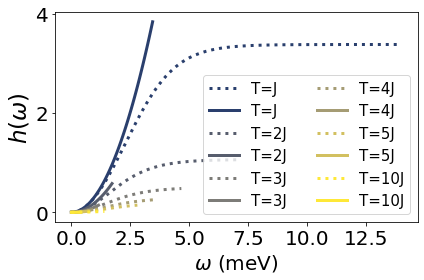

In [36]:
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega) +1

alph=3.05
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        if c[int(T)-1]==0:
            
            w2=np.linspace(0,np.max(w),200)
            line=(w2/10.34 +ed.mu)*slope+intercept
            anf_pre=(analytical_form(w2,T*10.34, alph) )#*(line)

            anf=anf_pre
            fac=analytical_coef(T*10.34, alph) 
            print(fac,T)
            x=w2/(T*10.34)
            x2=x[:50]
            if T==1.0:
                plot(x, (anf-anf[0]),color=plt.cm.cividis(T/6),lw=3, ls=':', label='T=J', zorder=T-0.5)
                plot(x2, fac*x2*x2,color=plt.cm.cividis(T/6),lw=3, ls='-', label='T=J', zorder=T-0.5)
            else:
                
                plot(x,(anf-anf[0]),color=plt.cm.cividis(T/6),lw=3, ls=':', label='T='+str(int(T))+'J', zorder=T-0.5)
                plot(x2,fac*x2*x2,color=plt.cm.cividis(T/6),lw=3, ls='-', label='T='+str(int(T))+'J', zorder=T-0.5)
            c[int(T)-1]=c[int(T)-1]+1
        y2=(np.array(d.iloc[s]))
        y=y2/y2[0]-1
        
        
        # scatter(w, y, s=40, color=plt.cm.cividis(T/12), marker='o',  zorder=T, edgecolor='k')
        
        
        # plot(w, scalingF(w,popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))
        xticks(size=20)
        yticks(size=20)
        # plt.ylim(2.5,3.5)
        pyplot.locator_params(axis='y', nbins=4)
        pyplot.locator_params(axis='x', nbins=7)
        # legend(prop={'size': 15})

        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [1.,2.0,3.0,4.0,5.0,10.0]:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
        
plt.xlabel(r'$\omega$ (meV)', size=20)
plt.ylabel(r"$h(\omega)$", size=23)
plt.tight_layout()
plt.legend(prop={'size': 15}, ncol=2)
plt.savefig("imgs/pap_fig3a", dpi=400)

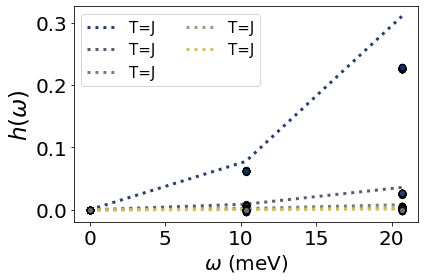

In [45]:

alph=3.05
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        if c[int(T)-1]==0:
            
            w2=np.linspace(0,np.max(w),200)
            line=(w2/10.34 +ed.mu)*slope+intercept
            anf_pre=(analytical_form(w2,T*10.34, alph) )#*(line)

            anf=anf_pre
            fac=analytical_coef2(T*10.34, alph) 


            plot(w[:3], w[:3]*w[:3]*fac,color=plt.cm.cividis(T/6),lw=3, ls=':', label='T=J', zorder=T-0.5)

            c[int(T)-1]=c[int(T)-1]+1
        
        line=(w/10.34 +ed.mu)*slope+intercept
        fac=line/line[0]#analytical_coef(T*10.34, alph) 
        y2=(np.array(d.iloc[s]))/fac
        y=(y2-y2[0])/y2[0]
        
        
        
        
        # scatter(w, y, s=40, color=plt.cm.cividis(T/12), marker='o',  zorder=T, edgecolor='k')
        scatter(w[:3], y[:3], s=40, color=plt.cm.cividis(T/12), marker='o',  zorder=T, edgecolor='k')
        
        
        # plot(w, scalingF(w,popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))
        xticks(size=20)
        yticks(size=20)
        # plt.ylim(2.5,3.5)
        pyplot.locator_params(axis='y', nbins=4)
        pyplot.locator_params(axis='x', nbins=7)
        # legend(prop={'size': 15})

        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [1,2,3,4,5]:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
        
plt.xlabel(r'$\omega$ (meV)', size=20)
plt.ylabel(r"$h(\omega)$", size=23)
plt.tight_layout()
plt.legend(prop={'size': 15}, ncol=2)
plt.savefig("imgs/pap_fig3a", dpi=400)

4.167107835683117 1
5.421192754555617 2
5.773241046035068 3
5.910651155057113 4
5.977094582938986 5


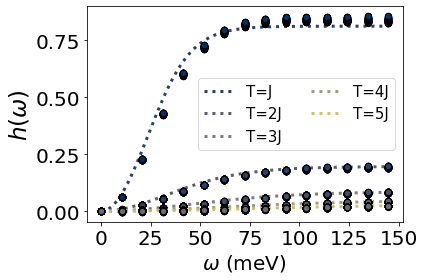

In [19]:

alph=3.05
alphaT=[]
AT=[]
Tf=[]
c=np.zeros(10)

def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    for s,Qq in enumerate(Q):
        # print(s)
        line=(w/10.34 +ed.mu)*slope+intercept
        
        if c[int(T)-1]==0:
            
            w2=np.linspace(0,np.max(w),200)
            line=(w2/10.34 +ed.mu)*slope+intercept
            anf_pre=(analytical_form(w2,T*10.34, alph) )#*(line)

            anf=anf_pre
            fac=anf[0]#analytical_coef(T*10.34, alph) 
            print(fac,T)
            x=w2#/(T*10.34)
            x2=x[:50]
            if T==1.0:
                plot(x, (anf-anf[0])/fac,color=plt.cm.cividis(T/6),lw=3, ls=':', label='T=J', zorder=T-0.5)
            else:
                
                plot(x,(anf-anf[0])/fac,color=plt.cm.cividis(T/6),lw=3, ls=':', label='T='+str(int(T))+'J', zorder=T-0.5)
            c[int(T)-1]=c[int(T)-1]+1
        
        line=(w/10.34 +ed.mu)*slope+intercept
        fac=line/line[0]#analytical_coef(T*10.34, alph) 
        y2=(np.array(d.iloc[s]))/fac
        y=(y2-y2[0])/y2[0]
        
        
        
        
        scatter(w, y, s=40, color=plt.cm.cividis(T/12), marker='o',  zorder=T, edgecolor='k')
        
        
        # plot(w, scalingF(w,popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))
        xticks(size=20)
        yticks(size=20)
        # plt.ylim(2.5,3.5)
        pyplot.locator_params(axis='y', nbins=4)
        pyplot.locator_params(axis='x', nbins=7)
        # legend(prop={'size': 15})

        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [1,2,3,4,5]:
        dfp=df.copy()
        df2=dfp.loc[(dfp['theta'] ==th )&(dfp['T'] ==TT )]
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=TT)
        
plt.xlabel(r'$\omega$ (meV)', size=20)
plt.ylabel(r"$h(\omega)$", size=23)
plt.tight_layout()
plt.legend(prop={'size': 15}, ncol=2)
plt.savefig("imgs/pap_fig3a", dpi=400)